In [2]:
import warnings
import os
warnings.simplefilter('ignore')

os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample/bin')
from norms import *
from dataset import *
os.chdir('/Users/bdemeo/Documents/bergerlab/lsh/ample')

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
import csv
import os
from sklearn import preprocessing

def open_data(NAMESPACE, parent_dir='data/', delimiter = '\t', dimred=True, annos = []):

    filename = 'dimred' if dimred else 'full'
    with open(parent_dir+NAMESPACE+'/'+filename+'.txt') as f:
        reader = csv.reader(f, delimiter = delimiter)
        data = np.array(list(reader)).astype(float) #assumes clean data, no column names

    result = dataset(data, path=parent_dir+NAMESPACE+'/')


    for anno in annos: #search for the indicated annotation file
        if os.path.exists(parent_dir+NAMESPACE+'/'+anno+'.txt'):
            with open(parent_dir+NAMESPACE+'/'+anno+'.txt') as f:
                reader = csv.reader(f, delimiter = delimiter)
                labels = np.array(list(reader))
                labels = [x[0] for x in labels]
                result.data[anno] = labels
        else:
            print('WARNING: could not find annotation {}'.format(anno))


    #search for subsamples
    if os.path.exists(parent_dir+NAMESPACE+'/ft.txt'):
        result.load_subsample(parent_dir+NAMESPACE+'/ft.txt', name='ft', delimiter=delimiter)


    return(result)


In [4]:
import numpy as np
import umap.umap_ as umap
from fbpca import pca
from ipywidgets import interact, interact_manual
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.metrics import pairwise_distances, adjusted_rand_score
from heapq import nlargest
from scipy.stats import spearmanr

In [5]:
pbmc = open_data('pbmc',annos=['labels'])

In [7]:
pbmc_small = pbmc.subsamples['ft'][1:2000]

In [8]:
pbmc_small.gaussian_label('labels')

In [15]:
pbmc_small.grow()

making embedding
making embedding
embedding size 999


/usr/local/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/usr/local/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compil

(999, 3)


interactive(children=(IntSlider(value=500, description='N', max=999, min=1), Dropdown(description='color', opt…

In [94]:
pbmc_small.nearest_label('labels')

In [79]:
pbmc_small.gaussian_label('labels_nearest', name='labels_updated', scaling=1)

In [52]:
pbmc_small.gaussian_label('labels_updated', name = 'labels_updated')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [78]:
adjusted_rand_score(pbmc_small.data['labels'].tolist(), pbmc_small.data['labels_updated'].tolist())

0.062102142101800636

In [95]:
adjusted_rand_score(pbmc_small.data['labels'].tolist(), pbmc_small.data['labels_gaussfit'].tolist())

0.9582858704795431

In [96]:
adjusted_rand_score(pbmc_small.data['labels'].tolist(), pbmc_small.data['labels_nearest'].tolist())

0.6014009263011599

In [36]:
adjusted_rand_score(pbmc_small.data['labels'].tolist(), pbmc_small.data['labels_nearest_gaussfit'].tolist())

0.5524140461681358

In [84]:
pbmc_small.grow()

making embedding
making embedding
embedding size 299
(299, 6)


interactive(children=(IntSlider(value=150, description='N', max=299, min=1), Dropdown(description='color', opt…

In [10]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 9]

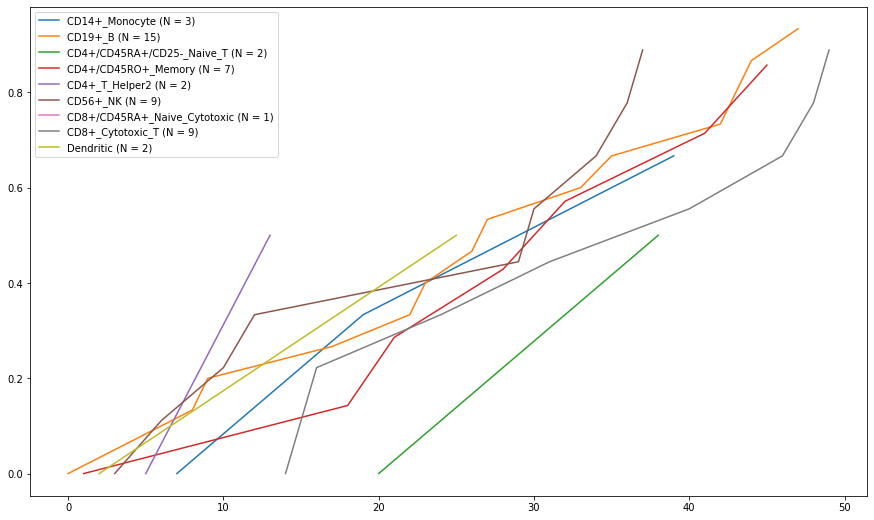

In [13]:
pbmc.subsamples['ft'][:50].plot_sampling_rate('labels')

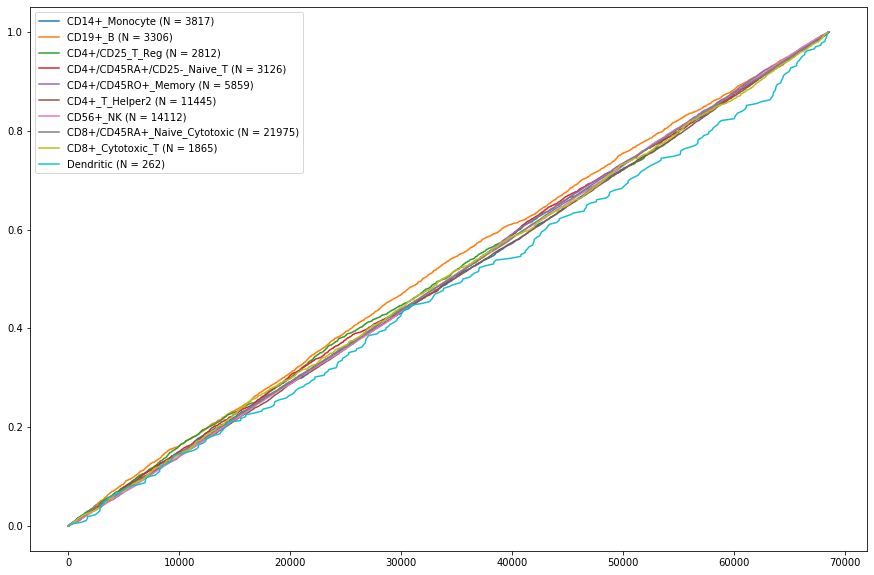

In [60]:
pbmc.plot_sampling_rate('labels')

In [58]:
plt.rcParams['figure.figsize'] = [15, 10]

In [97]:
def euclidean(x1, x2):
    return(np.linalg.norm(np.array(x1)-np.array(x2)))


In [98]:
euclidean([1,1,1],[2,3,2])

2.449489742783178